Colab Sheet Link:https://colab.research.google.com/drive/1SzbJ_576Sreku-AhKiFk8diX4t83xX0z?usp=sharing

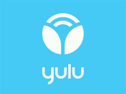

**Data Analysis and Visualisation By Piyush Joshi**

**Introduction:**

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to
revolutionize daily commutes by offering unique, sustainable transportation solutions.
However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles,
specifically in the Indian market.

**Column Profiling:**

● datetime: datetime

● season: season (1: spring, 2: summer, 3: fall, 4: winter)

● holiday : whether day is a holiday or not

● workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

● weather:

1: Clear, Few clouds, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light
Rain + Scattered clouds

4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

● temp: temperature in Celsius

● atemp: feeling temperature in Celsius

● humidity: humidity

● windspeed: wind speed

● casual: count of casual users

● registered: count of registered users

● count: count of total rental bikes including both casual and registered

**1. Define the Problem Statement, Import the required Libraries and perform EDA**


● Which variables are significant in predicting the demand for shared electric cycles in the
Indian market?

● How well those variables describe the electric cycle demands?

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/file/d/1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i/view?usp=sharing
To: /content/view?usp=sharing
87.8kB [00:00, 9.80MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**a. Examine dataset structure, characteristics, and statistical summary.**

In [ ]:
# Read the downloaded CSV file into a pandas DataFrame
df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#Checking the unique values to make sure which columns are continuous and categorical
for col in df.columns:
  unique_values = df[col].unique()
  print(f"Unique values for column '{col}':")
  print(unique_values)
  print("-"*70)

Unique values for column 'datetime':
['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
----------------------------------------------------------------------
Unique values for column 'season':
[1 2 3 4]
----------------------------------------------------------------------
Unique values for column 'holiday':
[0 1]
----------------------------------------------------------------------
Unique values for column 'workingday':
[0 1]
----------------------------------------------------------------------
Unique values for column 'weather':
[1 2 3 4]
----------------------------------------------------------------------
Unique values for column 'temp':
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.

**b. Identify missing values and perform Imputation using an appropriate method.**


In [ ]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


**c. Identify and remove duplicate records.**


In [ ]:
df.duplicated().any()

False

**d. Analyze the distribution of Numerical & Categorical variables, separately**

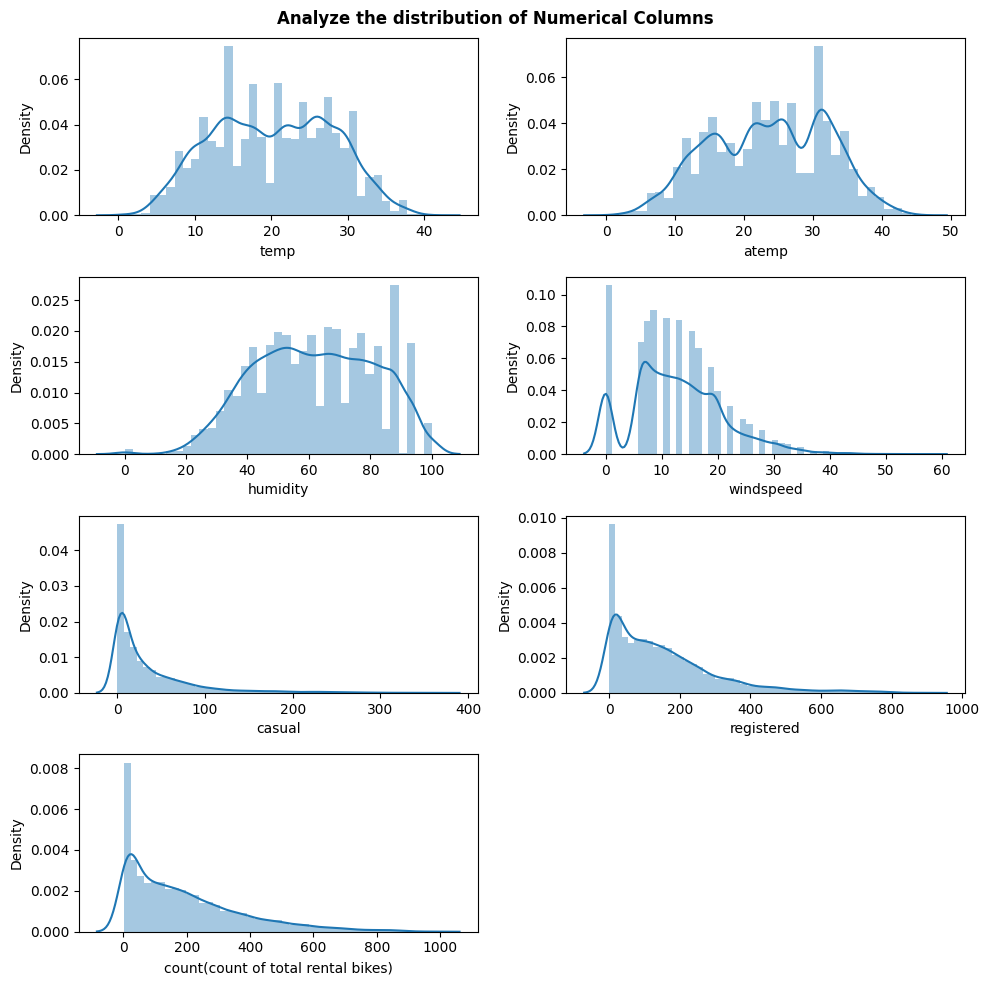

<Figure size 640x480 with 0 Axes>

In [ ]:
#Analyze the distribution of Numerical Columns
fig, axis=plt.subplots(4,2,figsize=(10,10))
fig.suptitle("Analyze the distribution of Numerical Columns",weight='bold')

sns.distplot(x=df["temp"],ax=axis[0,0])
axis[0,0].set(xlabel='temp')

sns.distplot(x=df["atemp"],ax=axis[0,1])
axis[0,1].set(xlabel='atemp')

sns.distplot(x=df["humidity"],ax=axis[1,0])
axis[1,0].set(xlabel='humidity')

sns.distplot(x=df["windspeed"],ax=axis[1,1])
axis[1,1].set(xlabel='windspeed')

sns.distplot(x=df["casual"],ax=axis[2,0])
axis[2,0].set(xlabel='casual')

sns.distplot(x=df["registered"],ax=axis[2,1])
axis[2,1].set(xlabel='registered')

sns.distplot(x=df["count"],ax=axis[3,0])
axis[3,0].set(xlabel='count(count of total rental bikes)')

fig.delaxes(axis[3, 1])
plt.tight_layout()
plt.show()

# Remove the empty subplot
fig.delaxes(axis[2, 1])
plt.tight_layout()
# Adjust the space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.4)
# Show the plot
plt.show()

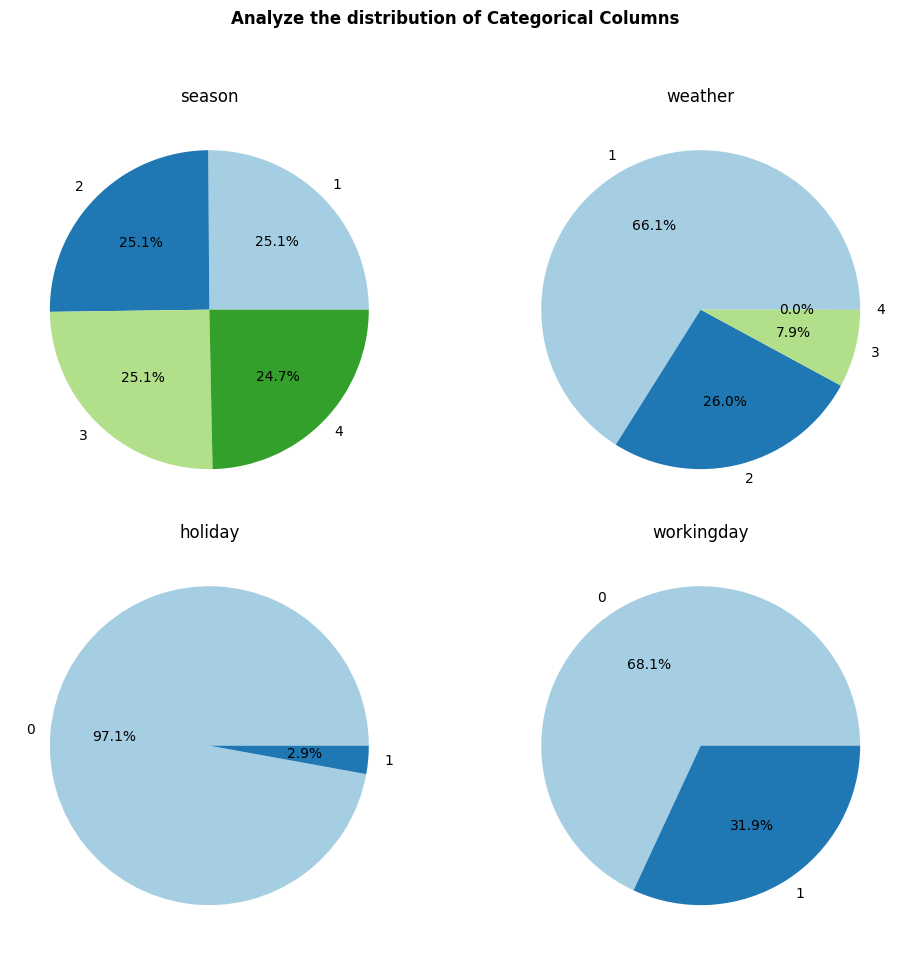

In [ ]:
#Analyze the distribution of Categorical Variables
import matplotlib.pyplot as plt

# Define softer shades of blue and green
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c']

fig, axis = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Analyze the distribution of Categorical Columns", weight='bold')

axis[0, 0].pie(df["season"].value_counts(), labels=df["season"].unique(), colors=colors, autopct='%1.1f%%')
axis[0, 0].set_title('season')

axis[0, 1].pie(df["weather"].value_counts(), labels=df["weather"].unique(), colors=colors, autopct='%1.1f%%')
axis[0, 1].set_title('weather')

axis[1, 0].pie(df["holiday"].value_counts(), labels=df["holiday"].unique(), colors=colors, autopct='%1.1f%%')
axis[1, 0].set_title('holiday')

axis[1, 1].pie(df["workingday"].value_counts(), labels=df["workingday"].unique(), colors=colors, autopct='%1.1f%%')
axis[1, 1].set_title('workingday')

# Adjusting layout to fit the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



**Outliers for every variable**

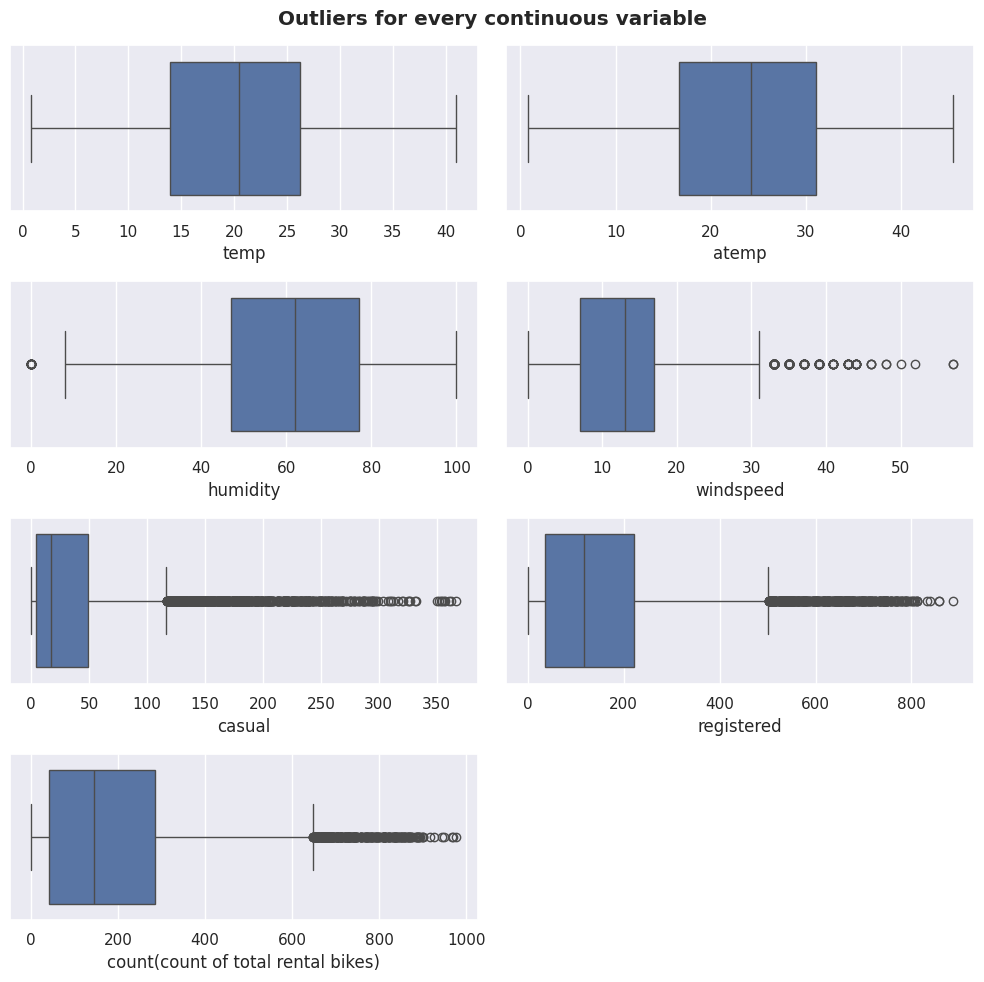

<Figure size 640x480 with 0 Axes>

In [ ]:
#Outliers for every continuous variable
fig, axis=plt.subplots(4,2,figsize=(10,10))
fig.suptitle("Outliers for every continuous variable",weight='bold')

sns.boxplot(x=df["temp"],ax=axis[0,0])
axis[0,0].set(xlabel='temp')

sns.boxplot(x=df["atemp"],ax=axis[0,1])
axis[0,1].set(xlabel='atemp')

sns.boxplot(x=df["humidity"],ax=axis[1,0])
axis[1,0].set(xlabel='humidity')

sns.boxplot(x=df["windspeed"],ax=axis[1,1])
axis[1,1].set(xlabel='windspeed')

sns.boxplot(x=df["casual"],ax=axis[2,0])
axis[2,0].set(xlabel='casual')

sns.boxplot(x=df["registered"],ax=axis[2,1])
axis[2,1].set(xlabel='registered')

sns.boxplot(x=df["count"],ax=axis[3,0])
axis[3,0].set(xlabel='count(count of total rental bikes)')

fig.delaxes(axis[3, 1])
plt.tight_layout()
plt.show()

# Remove the empty subplot
fig.delaxes(axis[2, 1])
plt.tight_layout()
# Adjust the space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.4)
# Show the plot
plt.show()


*   **Remove/clip the data between the 5 percentile and 95 percentile**

In [ ]:
#Creating a list 'continuous_cols' with the names of your continuous variables
continuous_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual','registered','count']
# Calculating the IQR for each continuous column
Q1 = df[continuous_cols].quantile(0.25)
Q3 = df[continuous_cols].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing rows with outliers
df = df[~((df[continuous_cols] < lower_bound) | (df[continuous_cols] > upper_bound)).any(axis=1)]

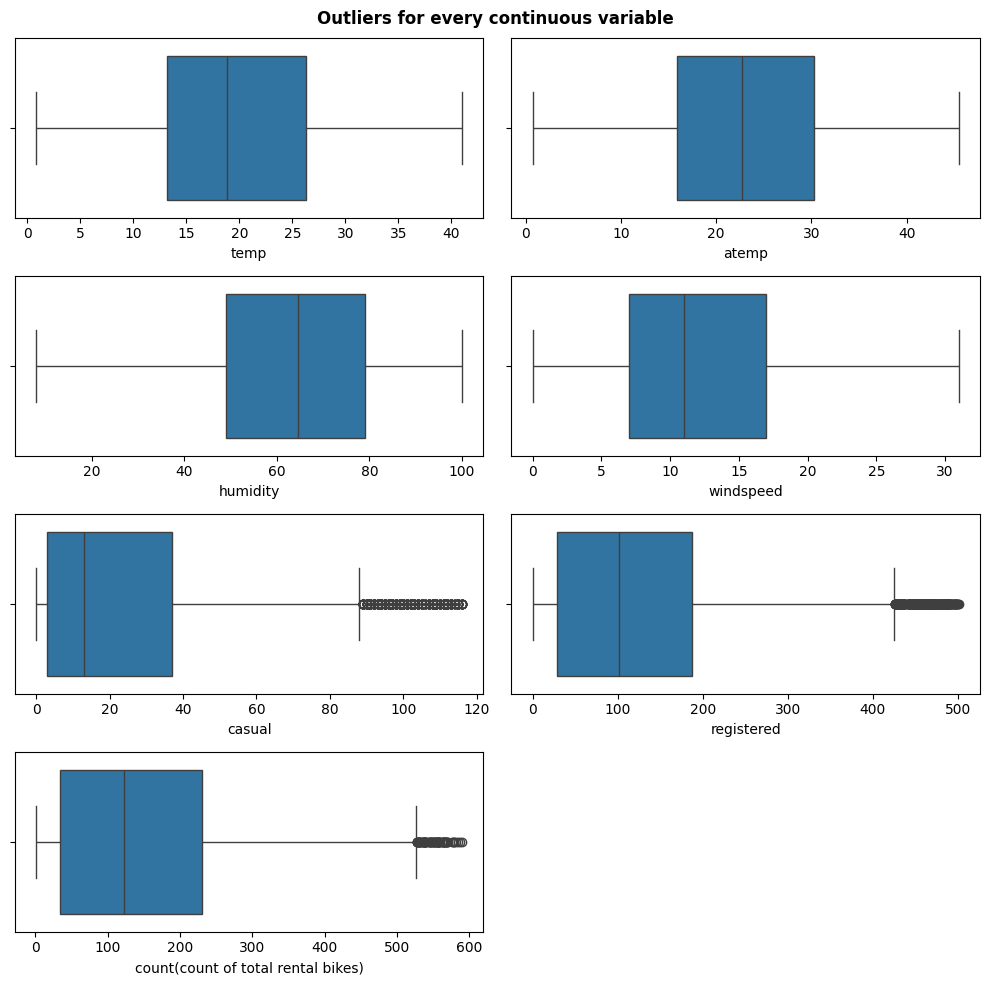

<Figure size 640x480 with 0 Axes>

In [ ]:
#Outliers for every continuous variable
fig, axis=plt.subplots(4,2,figsize=(10,10))
fig.suptitle("Outliers for every continuous variable",weight='bold')

sns.boxplot(x=df["temp"],ax=axis[0,0])
axis[0,0].set(xlabel='temp')

sns.boxplot(x=df["atemp"],ax=axis[0,1])
axis[0,1].set(xlabel='atemp')

sns.boxplot(x=df["humidity"],ax=axis[1,0])
axis[1,0].set(xlabel='humidity')

sns.boxplot(x=df["windspeed"],ax=axis[1,1])
axis[1,1].set(xlabel='windspeed')

sns.boxplot(x=df["casual"],ax=axis[2,0])
axis[2,0].set(xlabel='casual')

sns.boxplot(x=df["registered"],ax=axis[2,1])
axis[2,1].set(xlabel='registered')

sns.boxplot(x=df["count"],ax=axis[3,0])
axis[3,0].set(xlabel='count(count of total rental bikes)')

fig.delaxes(axis[3, 1])
plt.tight_layout()
plt.show()

# Remove the empty subplot
fig.delaxes(axis[2, 1])
plt.tight_layout()
# Adjust the space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.4)
# Show the plot
plt.show()

In [ ]:
df.shape #After removing outliers

(9518, 12)

**Insights:**
1. The data frame originally comprises of 10886 rows and 12 columns which was
which was reduced to 9518 rows and 12 columns after the removal of outliers.
2. No null values present in the dataframe.
3. No duplicate rows present in the dataframe.
4. Analysing the distribution of continuous variables shows some pattern of normality when it comes to  temp, atemp and humidity but shows a right skewed
distribution when it comes to windspeed,casual,registered and count of no. of rental bikes it shows a right skew distribution with registered uses significantly outnumbering the casual user and is almost at par with the available rental bikes.
5. Analysing the distribution of categorical variables:

    *   Weather: The weather is mostly clear, few clouds or partly cloudy with litlle to very low probability of heavy rain.

    *   Holidays and working days: 2.9% data account for holidays and 31.9% data account for working days. This imbalance on both pie charts may be indicating that a major portion of the data collected accounts for business done on weekends.

**Recommendations:**
1. Initiate targeted advertisement campaigns arounds weekends.
2. In the absence of null, duplicates and outliers proceed with confidence.     





**2. Try establishing a Relationship between the Dependent and Independent Variables.**

Hint:
i. Plot a Correlation Heatmap and draw insights.
ii. Remove the highly correlated variables, if any.

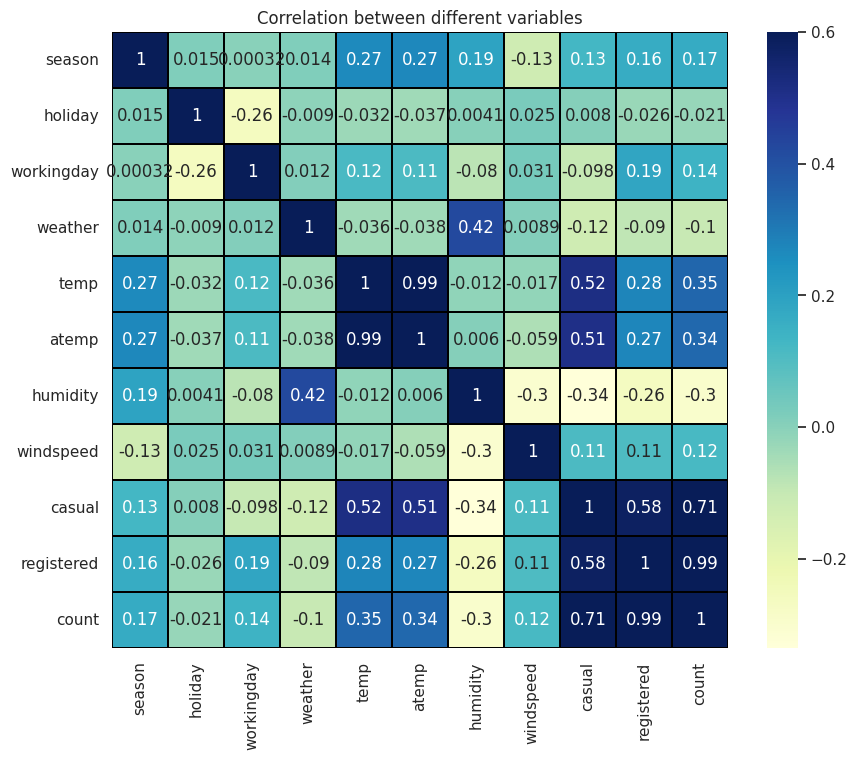

In [ ]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 8))
# The numeric_only parameter is set to True to only include numerical columns for correlation calculation.
correlation_values=df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_values, vmax=.6, linewidth=0.01, square=True, annot=True, cmap="YlGnBu", linecolor='black')
plt.title('Correlation between different variables')
plt.show()

**Insights:**

1. **Temperature and Humidity:** 'temp' and 'casual' have a higher correlation than 'temp' and 'registered' user count indicating higher rental business on sunny days, whereas humidity negatively impacts the rental business.
2. **Working days and holidays:** Registered users have positive moderate corelation with working days whereas casual users are usuallly weekend or holiday riders.
3. **Segmentation:**'registered' users show a strong positive correlation with 'count', implying a significant portion of rentals come from registered users.

**Recommendations:**

1. Investigate the impact of weather conditions like temperature/humidity and weekdays/weekends on bike rental demand to optimize pricing or availability.
2. Focus on attracting and retaining registered users by offering loyalty programs or targeted promotions to increase overall rentals.

**3. Check if there any significant difference between the no. of rides on Weekdays and holidays?**:

In [ ]:

weekday_rides = df[df['workingday'] == 1]['count']
holiday_rides = df[df['holiday'] == 1]['count']
print("weekday rides mean",weekday_rides.mean())
print("holiday rides mean",holiday_rides.mean())

weekday rides mean 161.97010309278352
holiday rides mean 133.21259842519686




* Remember the 'count' variable followed a right skewed distribution, to make it normal lets do a box-cox transformation.





In [ ]:
from scipy import stats
weekday_transformed, _ = stats.boxcox(weekday_rides)
weekend_transformed, _ = stats.boxcox(weekend_rides)

**Finally, performing the t-test to compare the means of the two samples by setting Null and alternative hypothesis**

In [ ]:
#H0: There is no significant difference between the no. of bike rides on Weekdays and Weekends.
#H1: Weekdays show greater no. of rides than the holidays,deduced by unequal means
t_stat,pvalue=stats.ttest_ind(weekday_transformed, weekend_transformed,alternative='greater')
alpha=.05
print("p-value:", pvalue)
if alpha < pvalue:
  print("There is no significant difference between the no. of bike rides on Weekdays and Weekends.")
else:
  print("Weekdays show greater no. of rides than the holidays.")

p-value: 1.7794478423934e-32
Weekdays show greater no. of rides than the holidays.


**Insights:**
1. 2 Sample T-Test shows there is a significant difference between rides happening on weekdays and holidays
2. Also the inequalities of mean values happening on week days and holidays suggesting a greater traction on weekdays.
**Inferences:**
1. Significant Difference in Rides: The 2 Sample T-Test indicates a statistically significant difference between the number of rides on weekdays and holidays.
2. Higher Traction on Weekdays: The mean values suggest that there are more rides on weekdays compared to holidays.
**Conclusions:**
1. Weekdays are Busier: The bike rental company experiences higher demand on weekdays, likely due to commuting needs.
2. Opportunity to Boost Holiday Rentals: There is potential to increase rentals on holidays through targeted strategies such as promotions or special offers.

**Recommendations:**
1. Increase Bike Availability on Weekdays: Ensure more bikes are available on weekdays to meet higher demand.
2. Promote Holiday Rentals: Implement special promotions or discounts to boost rentals on holidays.


**4. Check if the demand of bicycles on rent is the same for different Weather conditions?**

**a). Lets set H0 and H1**

H0: Demand of rides on rent is the same for different Weather conditions.

H1: Demand of rides on rent is not the same for different Weather conditions.

**b).Lets try one-way anova to map different categories across one numerical column.**

In [ ]:

clear_skies = df[df['weather'] == 1]['count']
misty_cloudy = df[df['weather'] == 2]['count']
Light_rain_snow = df[df['weather'] == 3]['count']
Heavy_rain_snow_thunderstorm= df[df['weather'] == 4]['count']
#H0: Demand of rides on rent is the same for different Weather conditions.
#H1: Demand of rides on rent is not the same for different Weather conditions.
f_stat,pvalue=stats.f_oneway(clear_skies,misty_cloudy, Light_rain_snow,Heavy_rain_snow_thunderstorm)
alpha=.05
print("p-value:", pvalue)
if pvalue < alpha:
  print("Demand of rides on rent is not the same for different Weather conditions.")
else:
  print("Demand of rides on rent is the same for different Weather conditions.")

p-value: 7.867839321549754e-27
Demand of rides on rent is not the same for different Weather conditions.


**c).Checking assumption for 1 way Anova i.e. Normality and Variance**

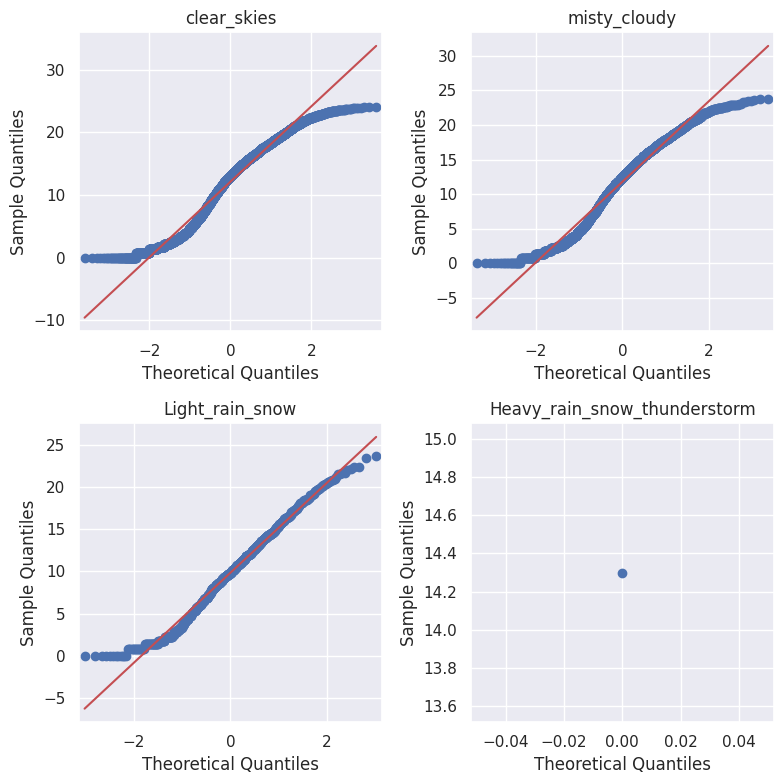

In [ ]:
#Checking Normality across all categories by QQplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(8,8))

sm.qqplot(clear_skies, line="s", ax=axes[0, 0])
axes[0, 0].set_title('clear_skies')

sm.qqplot(misty_cloudy, line="s", ax=axes[0, 1])
axes[0, 1].set_title('misty_cloudy')

sm.qqplot(Light_rain_snow, line="s", ax=axes[1, 0])
axes[1, 0].set_title('Light_rain_snow')

sm.qqplot(Heavy_rain_snow_thunderstorm, line="s", ax=axes[1, 1])
axes[1, 1].set_title('Heavy_rain_snow_thunderstorm')

plt.tight_layout()
plt.show()

In [ ]:
print(f"NOTE: since there exist only {len(Heavy_rain_snow_thunderstorm)} data point for\nHeavy_rain_snow_thunderstorm, it won't work with Shapiro Wilk")

NOTE: since there exist only 1 data point for
Heavy_rain_snow_thunderstorm, it won't work with Shapiro Wilk


 **Lets discuss the statistical test to asses Normality(Shapiro-Wilk-Test)**





In [ ]:
#H0: The data is normally distributed for clear skies
#H1: The data is not normally distributed for clear skies
from scipy.stats import shapiro
test_stat,pvalue=shapiro(clear_skies)
alpha=.05
print("p-value for clear skies:", pvalue)
if pvalue > alpha:
  print("The data is normally distributed for clear skies.")
else:
  print("The data is not normally distributed clear skies.")

#H0:The data is normally distributed for misty cloudy
#H1:The data isn't normally distributed for misty cloudy
test_stat,pvalue=shapiro(misty_cloudy)
alpha=.05
print("p-value for misty cloudy:", pvalue)
if pvalue > alpha:
  print("The data is normally distributed for misty cloudy.")
else:
  print("The data is not normally distributed for misty cloudy.")

#H0:The data is normally distributed for light rain & snow
#H1:The data isn't normally distributed for light rain & snow
test_stat,pvalue=shapiro(Light_rain_snow)
alpha=.05
print("p-value for light rain & snow:", pvalue)
if pvalue > alpha:
  print("The data is normally distributed for light rain & snow.")
else:
  print("The data is not normally distributed for light rain & snow.")


p-value for clear skies: 3.124536629582929e-50
The data is not normally distributed clear skies.
p-value for misty cloudy: 2.1028135244186288e-36
The data is not normally distributed for misty cloudy.
p-value for light rain & snow: 7.518848257749986e-27
The data is not normally distributed for light rain & snow.


**Another assumption for ANOVA is to equal variance in different categories(Levene Test)**


In [ ]:
#H0: All variances are equal
#H1: Not all variances are equal
from scipy import stats
levene_test_stat,pvalue=stats.levene(clear_skies,misty_cloudy,Light_rain_snow)
print("p-value:", pvalue)
alpha=.05
if alpha> pvalue:
  print("Not all variances are equal.")
else:
  print("All variances are equal.")

p-value: 1.1479762859567072e-28
Not all variances are equal.


**Now that the assumption of 1 way Anova haven't met let's go ahead with Kruskal-Walis H Test**


In [ ]:
#H0: Demand of rides on rent is the same for different Weather conditions.
#H1: Demand of rides on rent is not the same for different Weather conditions
from scipy.stats import kruskal
kruskal_stat,pvalue=kruskal(clear_skies,misty_cloudy, Light_rain_snow,Heavy_rain_snow_thunderstorm)
alpha=.05
print("p-value:", pvalue)
if pvalue < alpha:
  print("Demand of rides on rent is not the same for different Weather conditions.")
else:
  print("Demand of rides on rent is the same for different Weather conditions.")

p-value: 5.738374025114387e-25
Demand of rides on rent is not the same for different Weather conditions.


**Insights:**
1. **Clear Skies Preference:** Bike rentals are highest during clear skies and moderate temperatures, indicating a preference for pleasant weather conditions
2. **Adverse Weather Impact:** Rainy, snowy, or stormy weather significantly reduces bike rental demand, suggesting weather sensitivity among users.
**Inferences & Conclusions:**
1. **Adverse weather conditions** deter individuals from renting bikes, highlighting the importance of weather-related considerations in business strategies.
2. **Clear skies and comfortable temperatures** being the most favored time to rent a ride.

**Recommendations:**
1. **Safety Measures:** Implement safety measures and provide protective gear (e.g., raincoats) to encourage rentals during light rain or drizzle.
2. **Promotional Campaigns:** Launch targeted advertising campaigns highlighting the benefits of bike rentals during pleasant weather conditions.

**5. Check if the demand of bicycles on rent is the same for different Seasons?**

**a). Setting H0 and H1**

H0: Demand of rides on rent is the same for different seasons.

H1: Demand of rides on rent is not the same for different seasons.

**b). Let's decide 1 way Anova to map different categories against numerical variable.**

In [ ]:
spring_rides = df[df['season'] == 1]['count']
summer_rides = df[df['season'] == 2]['count']
fall_rides = df[df['season'] == 3]['count']
winter_rides = df[df['season'] == 4]['count']
#H0: Demand of rides on rent is the same for all seasons.
#H1: Demand of rides on rent is not the same across all seasons.
f_stat,pvalue=stats.f_oneway(spring_rides,summer_rides,fall_rides,winter_rides)
alpha=.05
print("p-value:", pvalue)
if pvalue < alpha:
  print("Demand of rides on rent is not the same for all seasons.")
else:
  print("Demand of rides on rent is the same for all seasons.")

p-value: 1.328514170995064e-98
Demand of rides on rent is not the same for all seasons.


**c).Lets check Normality for assumption for Anova by checking Skewness and Kurtosis**

In [ ]:
#Checking Normality across all categories by skewness and kurtosis
print("For spring_rides")
print("skewness:",spring_rides.skew())
print("kurtosis:",spring_rides.kurtosis())
if abs(spring_rides.skew()) > 0.75 or abs(spring_rides.kurtosis()-3)>1:
  print("Spring data is not normally distributed")
else:
    print("Spring data is normally distributed")
print("For summer_rides")
print("skewness:",summer_rides.skew())
print("kurtosis:",summer_rides.kurtosis())
if abs(summer_rides.skew()) > 0.75 or abs(summer_rides.kurtosis()-3)>1:
  print("Summer data is not normally distributed")
else:
    print("Summer data is normally distributed")
print("For fall_rides")
print("skewness:",fall_rides.skew())
print("kurtosis:",fall_rides.kurtosis())
if abs(fall_rides.skew()) > 0.75 or abs(fall_rides.kurtosis()-3)>1:
  print("Fall data is not normally distributed")
else:
    print("Fall data is normally distributed")
print("For winter_rides")
print("skewness:",winter_rides.skew())
print("kurtosis:",winter_rides.kurtosis())
if abs(winter_rides.skew()) > 0.75 or abs(winter_rides.kurtosis()-3)>1:
  print("Winter data is not normally distributed")
else:
    print("Winter data is normally distributed")



For spring_rides
skewness: 1.426548971916064
kurtosis: 2.057914587006701
Spring data is not normally distributed
For summer_rides
skewness: 0.7803073697754558
kurtosis: -0.10630190173403564
Summer data is not normally distributed
For fall_rides
skewness: 0.6609048991420622
kurtosis: -0.29719048846461327
Fall data is not normally distributed
For winter_rides
skewness: 0.7030779925617585
kurtosis: -0.30732594725873064
Winter data is not normally distributed


**Lets discuss the assumptions for 1 way Anova by statistically testing to asses Normality(Shapiro-Wilk-Test)**

In [ ]:
from math import e
#H0: The data is normally distributed for spring season
#H1: The data isn't normally distributed for spring season
from scipy.stats import shapiro
test_stat,pvalue=shapiro(spring_rides)
alpha=.05
print("p-value for spring season:", pvalue)
if alpha < pvalue:
  print("The data is normally distributed for spring season.")
else:
  print("The data is not normally distributed for spring season.")

#H1: The data isn't normally distributed for Summers
test_stat,pvalue=shapiro(summer_rides)
alpha=.05
print("p-value for Summers:", pvalue)
if alpha < pvalue:
  print("The data is normally distributed for Summers.")
else:
  print("The data is not normally distributed for Summers.")

#H0:The data is normally distributed for falls
#H1:The data isn't normally distributed for falls
test_stat,pvalue=shapiro(fall_rides)
alpha=.05
print("p-value for falls:", pvalue)
if alpha < pvalue:
  print("The data is normally distributed for falls.")
else:
  print("The data is not normally distributed for falls.")

#H0: The data is normally distributed for Winters
#H1: The data isn't normally distributed for Winters
test_stat,pvalue=shapiro(winter_rides)
alpha=.05
print("p-value for Winters:", pvalue)
if alpha < pvalue:
  print("The data is normally distributed for Winters.")
else:
  print("The data is not normally distributed for Winters.")


p-value for spring season: 2.0714964386977434e-42
The data is not normally distributed for spring season.
p-value for Summers: 1.2427934617894426e-33
The data is not normally distributed for Summers.
p-value for falls: 5.116183352101777e-31
The data is not normally distributed for falls.
p-value for Winters: 4.520785730802546e-33
The data is not normally distributed for Winters.


**Another assumption for ANOVA is to equal variance in different categories(Levene Test)**

In [ ]:
#H0: All variances are equal
#H1: All variances aren't equal
from scipy import stats
levene_test_stat,pvalue=stats.levene(spring_rides,summer_rides,fall_rides,winter_rides)
print("p-value:", pvalue)
alpha=.05
if alpha> pvalue:
  print("Not all variances are equal.")
else:
  print("All variances are equal.")

p-value: 6.687186315723853e-87
Not all variances are equal.


**Since neither assumptions for 1 way Anova are met we could have also gone in for the Kruskal-Walis H Test**

In [ ]:
#H0: Demand of rides on rent is the same for all seasons.
#H1: Demand of rides on rent is not the same across all seasons
kruskal_stat,pvalue=kruskal(spring_rides,summer_rides,fall_rides,winter_rides)
alpha=.05
print("p-value:", pvalue)
if pvalue < alpha:
  print("Demand of rides on rent is not the same for all seasons.")
else:
  print("Demand of rides on rent is the same for all seasons.")


p-value: 9.092946705054743e-93
Demand of rides on rent is not the same for all seasons.


**Insights:**
1. Bike rental demand fluctuates significantly across different seasons, indicating a strong influence of seasonal factors on customer behavior.
2. Demand is likely highest during specific seasons (e.g., summer or fall) due to favorable weather conditions and increased outdoor activities as establish by Heat Map.

**Inferences & Conclusions:**

1. Seasonality is a crucial factor to consider in business planning and resource allocation for bike rental services.
2. Understanding seasonal demand patterns enables informed decision-making regarding pricing, inventory management, and marketing strategies.

**Recommendations:**

1. Adjust pricing and inventory based on seasonal demand fluctuations to optimize revenue and resource utilization.
2. Tailor marketing campaigns to target specific customer segments during different seasons, highlighting relevant benefits and promotions.

**6. Check if the Weather conditions are significantly different during different Seasons?**

**a). Setting up H0 and H1**

H0: The Weather conditions are not significantly different during different Seasons

H1:  the Weather conditions are significantly different during different Seasons

**b).To detect relationship connection between 2 categories, we do a Chi-square Test**

In [ ]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weather_mapping = {1: 'clear_skies', 2: 'partly_cloudy', 3: 'mild_rain&snow', 4: 'thunderstorm&heavy_rain'}

df['season_named'] = df['season'].map(season_mapping)
df['weather_named'] = df['weather'].map(weather_mapping)
df['season_named'] = df['season'].map(season_mapping)
df['weather_named'] = df['weather'].map(weather_mapping)

In [ ]:
contigency_table=pd.crosstab(df['season_named'],df['weather_named'])
contigency_table

weather_named,clear_skies,mild_rain&snow,partly_cloudy,thunderstorm&heavy_rain
season_named,,,,
fall,1598,173,517,0
spring,1595,184,683,1
summer,1473,205,614,0
winter,1510,211,754,0


In [ ]:
chi2_stat,pvalue,dof,expected=chi2_contingency(contigency_table)
alpha=.05
print("p-value:", pvalue)
if pvalue < alpha:
  print("The Weather conditions are significantly different during different Seasons.")
else:
  print("The Weather conditions are not significantly different during different Seasons.")

p-value: 1.0976664201931212e-07
The Weather conditions are significantly different during different Seasons.


**Insights:**

1. Weather significantly varies across seasons.

2. Predicting weather based on the season is possible.

**Inferences & Conclusions:**

1. Seasonal weather patterns should inform business strategies
2. Geographic location and climate change may influence weather.

**Recommendations:**

1. Analyze specific weather conditions in each season.
2. Optimize resources and mitigate risks based on seasonal weather.